## Khushbu Soni   

# 2 Ridge Regression

## Q 4
### 4.1  Steps of stochastic gradient descent (SGD)

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


2 Ridge Regression: $Q$ - 4.1
$\rightarrow$ The error function $E(W)$ for linear regtression with $L 2$ Regularization is:
$$
E(w)=\frac{1}{2 N} \sum_{i=1}^N\left(t_n-w \cdot \phi\left(x_n\right)\right)^2+\frac{\lambda}{2}\|w\|^2
$$
where, $t_n=$ target variable
L2 Regularization
$w=$ weight vector
$\phi\left(x_n\right)=$ Basis function matrix. of dating
$\lambda=$ Regularisation parameter.
$\rightarrow$ Now the gradient of the Regularized error function:
$$
\begin{array}{r}
\nabla E(w)=\frac{d}{d w}\left(\frac{1}{2 N} \sum_{i=1}^N\left(t_n-w \cdot \phi\left(x_n\right)\right)^2+\frac{\lambda}{2}\|w\|^2\right) \\
=-\frac{1}{N} \sum_{i=1}^N\left(t_n-w \cdot \phi\left(x_n\right)\right) \cdot \phi\left(x_n\right) \\
+\lambda w
\end{array}
$$

$\rightarrow$ Weight update steps: for Gradient Descent:
$$
w^{(t)}=w^{(t-1)}-n \nabla E\left(w^{(t-1)}\right)
$$
where $w^{(t)}$ weight vector, $n=$ learning Rate $\nabla E\left(w^{(d-1)}\right)$ gradient of error function.
initialise the parameters at $t=1$ for single date point. Substitute gradient error function:
$$
\begin{aligned}
& \nabla E\left(w^{(t-1)}\right)=-\left(t_n-\phi x_n \cdot w\right) \cdot \phi\left(x_n\right)+\lambda w \\
& \phi^{(*+1)}=t^{(t)} \\
& w^{(t)}=w^{(t-1)}-n\left(\left(t_n-\phi\left(x_n\right) \cdot w\right) \cdot \phi\left(x_n\right)-\lambda w^{(t)}\right.
\end{aligned}
$$
$\therefore$ Final weight update Rule:
$$
w^{(t)}=w^{(t-1)}-\eta\left(\left(t_n-\phi\left(x_n\right) \cdot w\right) \cdot \phi\left(x_n\right)-\lambda w\right)
$$

### 4.2 Gradient Decent Regressor class implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Ridge Regressor:
class GradientDescentRidgeRegressor:
    def __init__(self, learning_rate=0.001, lambda_val=0.1, n_iterations=5000):
        self.learning_rate = learning_rate
        self.lambda_val = lambda_val
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Initialize weights (as a column vector to match X's shape)
        self.weights_ = np.zeros((X.shape[1], 1))

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Prediction
            predictions = X.dot(self.weights_)

            # Gradient of the cost function (adjusted shapes for broadcasting)
            gradient = (-2 / len(y)) * X.T.dot(y - predictions) + 2 * self.lambda_val * self.weights_

            # Update weights
            self.weights_ -= self.learning_rate * gradient

        return self

    def predict(self, X):
        return X.dot(self.weights_)

### 4.3 Effect of Regularisation

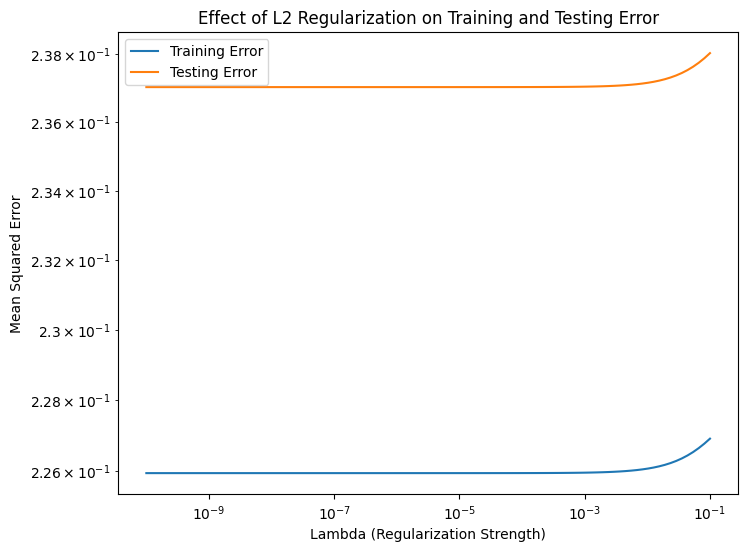

In [8]:


# Step 1: Define the function for generating y based on x
def f(X):
    return np.cos(3 * np.pi * X) / (2 + 3 * X)

# Step 2: Generate data using the given function f and specified bounds
def generate_data(n, f, a, b, noise=0.1**0.5, random_state=None):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y

# Step 3: Polynomial Feature Expansion (degree 5)
def polynomial_features(X, degree=5):
    X_poly = np.ones(X.shape)  # Add a bias column (intercept term)
    for i in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** i))
    return X_poly

# Step 4: Train Ridge Regression with different λ values and calculate errors
def evaluate_ridge_regression(X_train, y_train, X_test, y_test, lambdas, learning_rate=0.001, n_iterations=5000):
    train_errors = []
    test_errors = []

    for lambda_val in lambdas:
        model = GradientDescentRidgeRegressor(learning_rate=learning_rate, lambda_val=lambda_val, n_iterations=n_iterations)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_errors.append(np.mean((y_train - y_train_pred) ** 2))
        test_errors.append(np.mean((y_test - y_test_pred) ** 2))

    return train_errors, test_errors

# Generate training and testing data
X_train, y_train = generate_data(80, f, -0.3, 0.3, random_state=0)  # 80 samples for training
X_test, y_test = generate_data(20, f, -0.3, 0.3, random_state=42)   # 20 samples for testing

# Polynomial feature transformation
X_train_poly = polynomial_features(X_train, degree=5)
X_test_poly = polynomial_features(X_test, degree=5)

# Step 5: Define λ values and evaluate the model
lambdas = np.geomspace(10**-10, 0.1, 101, endpoint=True)
train_errors, test_errors = evaluate_ridge_regression(X_train_poly, y_train, X_test_poly, y_test, lambdas)

# Plot training and testing errors as a function of λ
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_errors, label='Training Error')
plt.plot(lambdas, test_errors, label='Testing Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of L2 Regularization on Training and Testing Error')
plt.legend()
plt.show()


Effect of Small
λ: For very small values of
λ, the regularization effect is negligible, and the model is allowed to fit the data closely. Hence, the training error stays low, and the testing error is also relatively low.

Effect of Large
λ: For large
λ values, the model becomes overly regularized (i.e., constrained by the regularization penalty), leading to higher errors both in training and testing. This is where underfitting starts to occur, meaning the model is too simplistic and unable to capture the underlying patterns in the data effectively.